# HI, HeI and CaII population

- 2020.06.10   k.i. 
- 2020.07.16   k.i., u.k.    population plot
- 2020.07.20   k.i.  add Src & tau_1D in both CloudModel.py    
- 2020.07.24   k.u.,k.i.  Transition_heatmap

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np

#%matplotlib inline
#%matplotlib qt
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%load_ext autoreload
%autoreload 2

from spectra_src.ImportAll import *
import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

C:\Users\lelou\AppData\Local\Temp\ipykernel_5028\875321342.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [36]:
from spectra_src.Struct import Atom, Atmosphere, Radiation
from spectra_src.Atomic import Collision, SEsolver, ContinuumOpacity, BasicP
from spectra_src.Util import HelpUtil
from spectra_src.Visual import Plotting#, Grotrian
from spectra_src.Atomic import LTELib
from spectra_src.Function.SEquil import SELib
from spectra_src.Atomic import Hydrogen
from spectra_src.Util.AtomUtils.AtomInfo import level_info, extract_lprof, each_prof
from spectra_src import Constants as Cst

from spectra_src import Elements

## Create atomic model

In [10]:
# Atomic model
import os

conf_path = os.path.join( CFG._ROOT_DIR, "data/conf/H.conf" )
atom_H, wMesh_H, path_dict_H = Atom.init_Atom_(conf_path , is_hydrogen=True)
conf_path = os.path.join( CFG._ROOT_DIR, "data/conf/He.conf" )
atom_He, wMesh_He, path_dict_He = Atom.init_Atom_(conf_path , is_hydrogen=False)
conf_path = os.path.join( CFG._ROOT_DIR, "data/conf/Ca_II.conf" )
atom_Ca, wMesh_Ca, path_dict_ca = Atom.init_Atom_(conf_path , is_hydrogen=False)


In [5]:
HelpUtil.help_( atom_He )
path_dict_He

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
Atom
|- Z                       int                                  v: 2
|- Mass                    float                                v: 4.0026
|- Abun                    float                                v: 0.08511380382023759
|- nLevel                  int                                  v: 27
|- nLine                   int                                  v: 205
|- nCont                   int                                  v: 26
|- nTran                   int                                  v: 231
|- nRL                     int                                  v: 39
|- Level                   struct array                         s: (27,)
  |-  erg                  float64                              s: (27,)
  |- 

{'folder': 'D:\\home\\python\\spectra\\data\\atom\\He',
 'conf': 'D:\\home\\Python\\spectra\\data\\conf\\He.conf',
 'Level': 'D:\\home\\python\\spectra\\data\\atom\\He\\He.Level',
 'Aji': 'D:\\home\\python\\spectra\\data\\atom\\He\\He.Aji',
 'CEe': 'D:\\home\\python\\spectra\\data\\atom\\He\\He.CE.electron',
 'CIe': 'D:\\home\\python\\spectra\\data\\atom\\He\\He.CI.electron',
 'PI': 'D:\\home\\python\\spectra\\data\\atom\\He\\He.Alpha',
 'RadiativeLine': 'D:\\home\\python\\spectra\\data\\atom\\He\\He.RadiativeLine',
 'Grotrian': 'D:\\home\\python\\spectra\\data\\atom\\He\\He.Grotrian'}

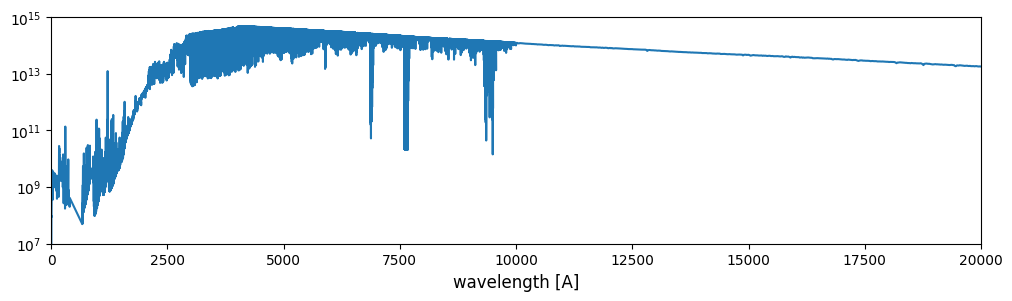

In [11]:
#  prepare solar radiation spectrum

atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=1.E11, Te=7.E3, Vd=0., Vt=5.E5)
solar_spec_H = Radiation.init_Radiation_(atmos, wMesh_H)
solar_spec_He = Radiation.init_Radiation_(atmos, wMesh_He)
solar_spec_Ca = Radiation.init_Radiation_(atmos, wMesh_Ca)
wl0 = solar_spec_H.backRad[0,:]*1E8  # wavelength of background spectrum [A]
wl_air = BasicP.vacuum_to_air_(wl0,'AA')
Isolar = solar_spec_H.backRad[1,:].copy()   # solar spectrum intensity    "    [erg/cm^3/s/str]
solar_spec_H.backRad[1,:] *= 0.5    # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_H.PI_intensity[:,:] *= 0.5    # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_He.backRad[1,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_He.PI_intensity[:,:] *= 0.5    # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_Ca.backRad[1,:] *= 0.5   # solar spectrum mean intensity    "    [erg/cm^3/s/str]
solar_spec_Ca.PI_intensity[:,:] *= 0.5    # solar spectrum mean intensity    "    [erg/cm^3/s/str]


fig, ax = plt.subplots(1,1, figsize=(12,3), dpi=100)
ax.plot(wl0, Isolar)
ax.set_xlim(0, 20000)
#ax.set_xlim(10000, 11000)
#ax.set_ylim(0,0.1E14)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e7,1e15)
ax.set_xlabel("wavelength [A]", fontsize=12)
plt.show()

In [7]:
HelpUtil.help_(solar_spec_H)

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
Radiation
|- backRad                 ndarray                              s: (2, 3525898)
|- PI_intensity            ndarray                              s: (8, 41)


In [8]:
HelpUtil.help_( atmos )

------------------------------------------------------------------------------------------
name                       type                                 value/len/shape
------------------------------------------------------------------------------------------
Atmosphere0D
|- Nh                      float                                v: 1000000000000.0
|- Ne                      float                                v: 100000000000.0
|- Te                      float                                v: 7000.0
|- Vd                      float                                v: 0.0
|- Vt                      float                                v: 500000.0
|- ndim                    int                                  v: 0
|- is_uniform              bool                                 v: True
|- Tr                      float                                v: 6000.0
|- use_Tr                  bool                                 v: False
|- doppler_shift_continuum  bool                   

## output intensity profile from a slab without background (emission)

In [35]:
Te = 8000.
Nh = 1e11
Ne = 1e10
Vd = 0.
Vt = 5e5            #   cm/s
depth = 1.E3 * 1.E5 #   km *1e5
Pg =  0.1          #   [Ba]

slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, Pg=Pg, use_Tr=False)     # slab 
SE_H, Rate_H = SELib.cal_SE_with_Pg_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)
print(f"Nh = {slab.Nh:.2E} [cm-3], Ne = {slab.Ne:.2E} [cm-3], Pg = {slab.Pg:.2E} [Ba], Te = {slab.Te:.2E} [K]")

Nh = 4.73E+10 [cm-3], Ne = 2.62E+10 [cm-3], Pg = 1.00E-01 [Ba], Te = 8.00E+03 [K]


In [37]:
from spectra_src.Function.SlabModel import CloudModel

Te = 8000.
Nh = 1e11
Ne = 1e10
Vd = 0.
Vt = 5e5            #   cm/s
depth = 1.E3 * 1.E5 #   km *1e5

slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
lH = CloudModel.SE_to_slab_0D_(atom_H, slab, SE_H, depth=depth)      # hydrogen lines intensity
SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He, SE_H.n_SE)  #  level populations etc.
lHe = CloudModel.SE_to_slab_0D_(atom_He, slab, SE_He, depth=depth)      # hydrogen lines intensity
SE_Ca, Rate_Ca = SELib.cal_SE_with_Nh_Te_(atom_Ca, slab, wMesh_Ca, solar_spec_Ca, SE_H.n_SE)  #  level populations etc.
lCa = CloudModel.SE_to_slab_0D_(atom_Ca, slab, SE_Ca, depth=depth)      # hydrogen lines intensity


E:\share\src\projects\20220620.spectra\spectra_src\Function\SlabModel\CloudModel.py:47: RuntimeWarning: invalid value encountered in true_divide
  Src   : T_ARRAY = ( Aji * nj ) / ( Bij * ni - Bji * nj )


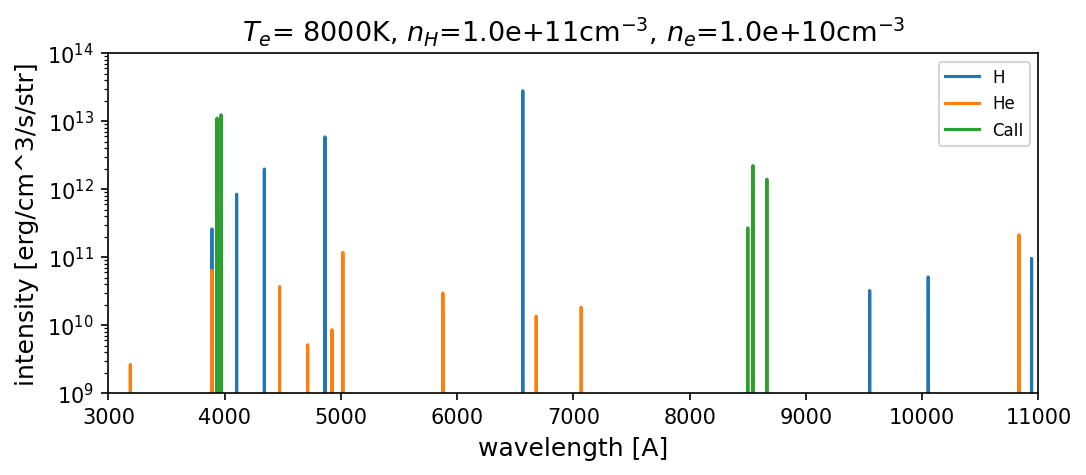

In [38]:
fig, ax = plt.subplots(1,1, figsize=(8,3), dpi=150)
ax.plot(lH.wl_1D*1e8,lH.prof_1D,label='H')
ax.plot(lHe.wl_1D*1e8,lHe.prof_1D,label='He')
ax.plot(lCa.wl_1D*1e8,lCa.prof_1D,label='CaII')
ax.set_ylim(1e9,1E14)
#ax.set_xlim(500, 50000)
#ax.set_xscale("log")
ax.set_xlim(3000, 11000)
ax.set_yscale("log")
#ax.set_ylim(0, 2e13)
ax.set_xlabel("wavelength [A]", fontsize=12)
ax.set_ylabel("intensity [erg/cm^3/s/str]", fontsize=12)
plt.title("$T_e$={0:5.0f}K, $n_H$={1:5.1e}cm$^{{-3}}$, $n_e$={2:5.1e}cm$^{{-3}}$".format(Te, Nh, Ne),fontsize=13)
ax.legend(fontsize=8,ncol=1)
plt.show()

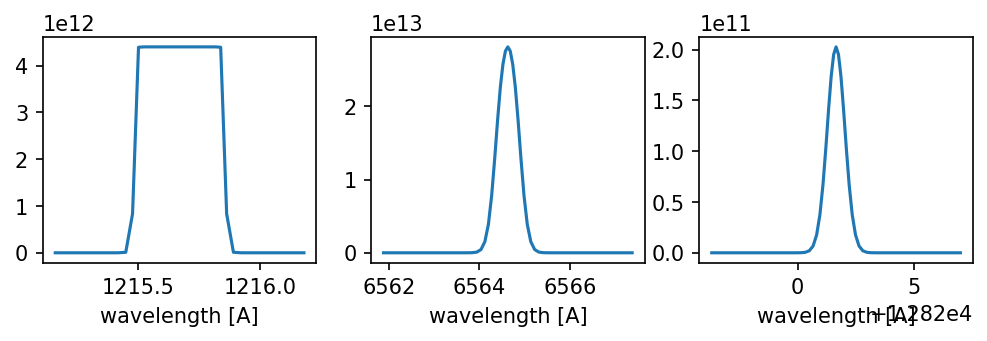

In [39]:
#  plot hydrogen lines

fig, axs = plt.subplots(1,3, figsize=(8,2), dpi=150)
for k in [0]:
    for j in [0,1,2]:
        wl, prof = each_prof(lH,j*7+k)
        axs[j].plot(wl*1e8,prof)
        axs[j].set_xlabel("wavelength [A]", fontsize=10)
        #axs[k,j].set_ylabel("intensity [erg/cm^3/s/str]", fontsize=10)
        
plt.show()

Ic, Src= 0.0 51050064309316.9
Ic, Src= 0.0 51051431557672.805
Ic, Src= 0.0 51069132976751.08


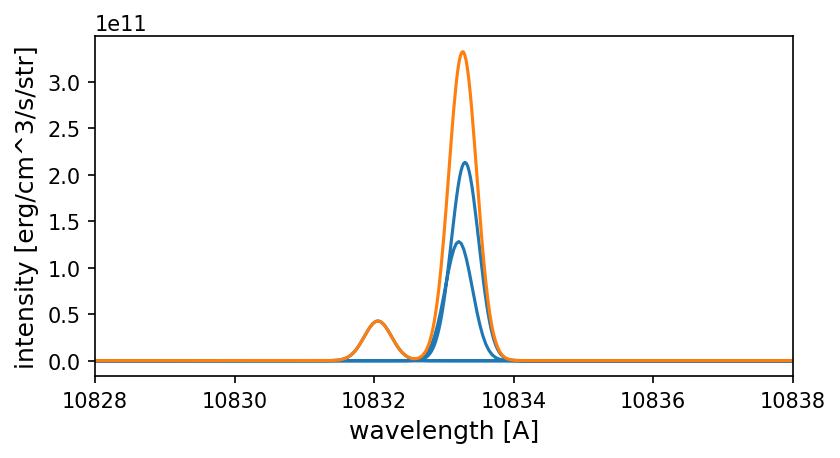

In [40]:
# plot HeI 10830 profile

wmin = 10828 ; wmax = 10838 ; dw = 0.02
wl,prof,tau1 = extract_lprof(lHe,wmin,wmax,dw)

fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=150)
ax.plot(lHe.wl_1D*1e8,lHe.prof_1D)
ax.plot(wl,prof)

ax.set_xlim(wmin, wmax)
#ax.set_ylim(1e9,1E14)
#ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("wavelength [A]", fontsize=12)
ax.set_ylabel("intensity [erg/cm^3/s/str]", fontsize=12)
plt.show()

In [15]:
##  method to access to Level info.
atom = atom_He
print('level stage',atom.Level['stage'])
print('level energy',atom.Level['erg'])
print('config. term, j',atom._ctj_table.Level[3])     
int(atom._ctj_table.Level[3][1][0]) == 3          # level#=3, 1=term,  '3'

level stage [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 3]
level energy [0.00000000e+00 3.17545235e-11 3.30301129e-11 3.35881704e-11
 3.35881856e-11 3.35883818e-11 3.39950204e-11 3.63989963e-11
 3.67223971e-11 3.68614031e-11 3.69680642e-11 3.69680647e-11
 3.69680735e-11 3.69687437e-11 3.69894818e-11 3.78016895e-11
 3.79292418e-11 3.79842328e-11 3.80294101e-11 3.80298016e-11
 3.93933398e-11 1.04783117e-10 1.04783799e-10 1.16892729e-10
 1.16892931e-10 1.16893115e-10 1.26580211e-10]
config. term, j ('1s.2p', '3P', '2')


True

## output intensity profile from a slab with continuum background

### cloud model: $\qquad$    $I_{out} = I_{c} e^{-\tau} + S (1-e^{-\tau})$


In [42]:
def lprof_slab(l,wl00,Isolar):
    
    dv = 1.   #  wavelength step, km/s
    vmax = 200.  #  max dwl, km/s

    dw = dv/Cst.c_*wl00*1e5
    wmin = wl00 - dw*vmax/dv
    wmax = wl00 + dw*vmax/dv
    if wl00 < 10000.:
        Ic = np.max(Isolar[np.where((wl0>wmin) & (wl0<=wmax))])
    else:
        Ic = np.interp(wl00, wl0, Isolar)
    wl, prof, tau = extract_lprof(l,wmin,wmax,dw,Ic=Ic)  #  prof = Src[k]*(1.- exp(-tau[:])) in CloudModel.SE_to_slab_0D_()

    return wl, prof, tau

Ic, Src= 255150959552079.12 41599735780053.82


NameError: name 'Ic_Ha' is not defined

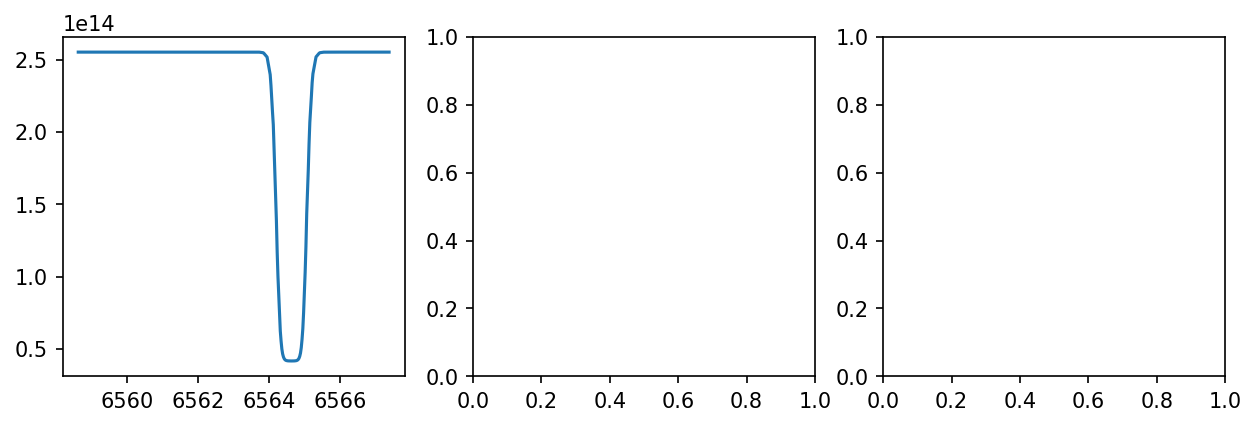

In [43]:
### ichimoto

import copy

#---------------------------------------------------------
Te = 8000.
Nh = 3e11
Ne = 1e10
Vd = 0.
Vt = 5e5            #   cm/s
depth = 2.E3 * 1.E5 #   km *1e5

amp =15.
solar_spec_He2 = copy.deepcopy(solar_spec_He)
ii = np.where(wl0 < 504)[0]
solar_spec_He2.backRad[1,ii] = solar_spec_He2.backRad[1,ii] * amp   # <===  enhanced EUV
idxs = np.where(wMesh_He.Cont_mesh.reshape(-1) < 540*1e-8)[0]
solar_spec_He2.PI_intensity.reshape(-1)[idxs] *= amp   # <===  enhanced EUV

slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
lH = CloudModel.SE_to_slab_0D_(atom_H, slab, SE_H, depth=depth)      # hydrogen lines intensity
SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He2, SE_H.n_SE)  #  level populations etc.
lHe = CloudModel.SE_to_slab_0D_(atom_He, slab, SE_He, depth=depth)      # hydrogen lines intensity
SE_Ca, Rate_ca = SELib.cal_SE_with_Nh_Te_(atom_Ca, slab, wMesh_Ca, solar_spec_Ca, SE_H.n_SE)  #  level populations etc.
lCa = CloudModel.SE_to_slab_0D_(atom_Ca, slab, SE_Ca, depth=depth)      # hydrogen lines intensity


fig, axs = plt.subplots(1,3, figsize=(10,3), dpi=150)
wl_Ha, prof_Ha, tau_Ha = lprof_slab(lH,6563.,Isolar)
axs[0].plot(wl_Ha,prof_Ha)
axs[0].set_ylim(0,Ic_Ha*1.2)
wl_854, prof_854, tau_854 = lprof_slab(lCa,8542.,Isolar)
axs[1].plot(wl_854,prof_854)
axs[1].set_ylim(0,Ic_854*1.2)
wl_1083, prof_1083, tau_1083 = lprof_slab(lHe,10830.,Isolar)
axs[2].plot(wl_854,prof_1083)
axs[2].set_ylim(0,Ic_1083*1.2)


NameError: name 'lprof_slab' is not defined

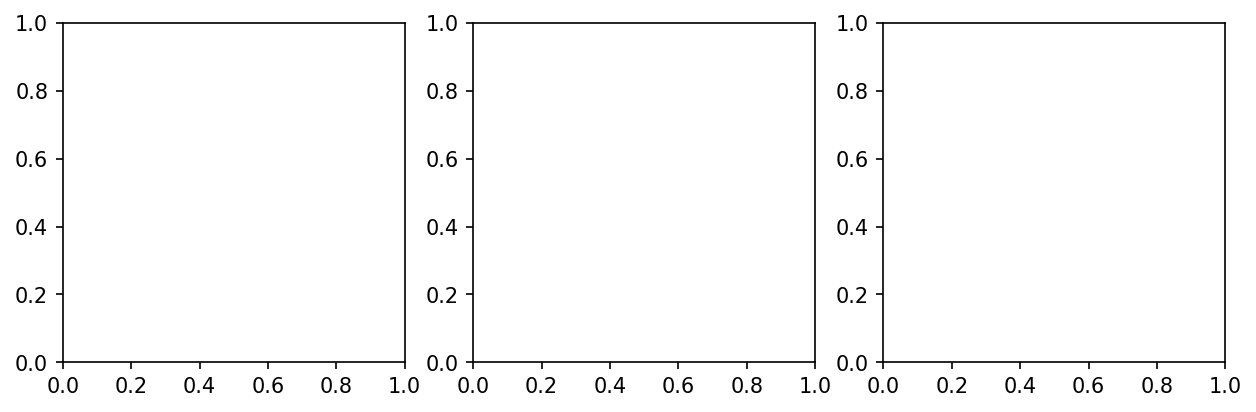

In [41]:


import copy

#---------------------------------------------------------
Te = 8000.
Nh = 3e11
Ne = 1e10
Vd = 0.
Vt = 5e5            #   cm/s
depth = 2.E3 * 1.E5 #   km *1e5

amp =15.
solar_spec_He2 = copy.deepcopy(solar_spec_He)
ii = np.where(wl0 < 504)[0]
solar_spec_He2.backRad[1,ii] = solar_spec_He2.backRad[1,ii] * amp   # <===  enhanced EUV
idxs = np.where(wMesh_He.Cont_mesh.reshape(-1) < 540*1e-8)[0]
solar_spec_He2.PI_intensity.reshape(-1)[idxs] *= amp   # <===  enhanced EUV

slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
lH = CloudModel.SE_to_slab_0D_(atom_H, slab, SE_H, depth=depth)      # hydrogen lines intensity
SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He2, SE_H.n_SE)  #  level populations etc.
lHe = CloudModel.SE_to_slab_0D_(atom_He, slab, SE_He, depth=depth)      # hydrogen lines intensity
SE_Ca, Rate_ca = SELib.cal_SE_with_Nh_Te_(atom_Ca, slab, wMesh_Ca, solar_spec_Ca, SE_H.n_SE)  #  level populations etc.
lCa = CloudModel.SE_to_slab_0D_(atom_Ca, slab, SE_Ca, depth=depth)      # hydrogen lines intensity


fig, axs = plt.subplots(1,3, figsize=(10,3), dpi=150)
wl_Ha, prof_Ha, tau_Ha = lprof_slab(lH,6563.,Isolar)
axs[0].plot(wl_Ha,prof_Ha)
axs[0].set_ylim(0,Ic_Ha*1.2)
wl_854, prof_854, tau_854 = lprof_slab(lCa,8542.,Isolar)
axs[1].plot(wl_854,prof_854)
axs[1].set_ylim(0,Ic_854*1.2)
wl_1083, prof_1083, tau_1083 = lprof_slab(lHe,10830.,Isolar)
axs[2].plot(wl_854,prof_1083)
axs[2].set_ylim(0,Ic_1083*1.2)



## lower level population of H and He

In [55]:
SE.n_SE[np.logical_not(mask)].shape
atom.Level['stage']


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 3])

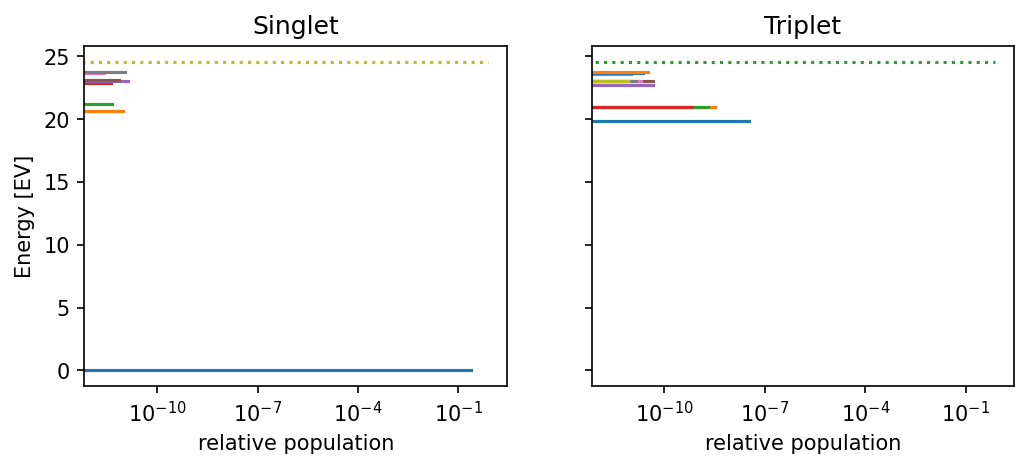

In [35]:
##  plot He populations  ####################################################

atom = atom_He
SE = SE_He
mask = atom.Level['stage'] == 1           # select neutoral
ilevel_heii = np.where(atom.Level['stage'] == 2)[0][0]      # HeI ionization = groud state of HeII

level_erg = atom.Level['erg'][mask]
level_erg = np.append( level_erg, atom.Level['erg'][ilevel_heii] )
level_ev  = level_erg / Cst.eV2erg_
level_energy = level_ev

level_pop = SE.n_SE[mask]
level_pop = np.append( level_pop,  SE.n_SE[np.logical_not(mask)].sum())

fig, axs = plt.subplots(1,2, figsize=[8,3], dpi=150, sharey=True, sharex=True)

#axt = axs.twinx()
for i in range(level_erg.shape[0]):
    s2p1 = int(atom._ctj_table.Level[i][1][0])   #  1 - HeI singlet, 2 - HeII or 3 - HeI triplet
    if s2p1 == 1:
        axs[0].set_title('Singlet')
        axs[0].plot([0,level_pop[i]],level_energy[i]*np.ones(2))
    elif s2p1 == 3:
        axs[1].set_title('Triplet')
        axs[1].plot([0,level_pop[i]],level_energy[i]*np.ones(2))
    elif s2p1 == 2:
        axs[0].plot([0,level_pop[i]],level_energy[i]*np.ones(2),':')
        axs[1].plot([0,level_pop[i]],level_energy[i]*np.ones(2),':')        
    else:
        continue
    #print(i, level_pop[i])
    
for ax in axs:
    ax.set_xscale('log')
    ax.set_xlabel('relative population')
axs[0].set_ylabel('Energy [EV]')
#ax.plot(level_erg,level_pop,'o')
#ax.barh(level_erg,level_pop, align='center')
#level_erg
plt.show()

In [44]:
atom = atom_He

stg =  atom.Level['stage'] 
ii1 =  np.where(atom.Level['stage'] == 1)[0]
#s2p1 = int(atom._ctj_table.Level[ii1][1][0])
#atom._ctj_table.Level[ii1][1][0]
ii1.shape

(20,)

In [88]:
atom = atom_He
ctj_level = atom._ctj_table.Level
idx_singlet = []
idx_triplet = []
s2p1_list = []
for i in range(atom.nLevel):
    #print(atom.Level['stage'][i])
    ctj = ctj_level[i]
    s2p1 = ctj[1][0]
    if s2p1 == '1':   # singlet
        idx_singlet.append(i)
    elif s2p1 == '3':
        idx_triplet.append(i)
    else:
        continue
    

SE_con = SE_He
Rate_con = Rate_He
idx_sort = idx_singlet + idx_triplet

#SE_con.n_SE[idx_sort]
Rmat = Rate_con.Rmat[idx_sort,:][:,idx_sort]
Cmat = Rate_con.Cmat[idx_sort,:][:,idx_sort]



In [78]:
np.arange(25).reshape(5,5)[[3,4,0,1,2],:][:,[3,4,0,1,2]]

array([[18, 19, 15, 16, 17],
       [23, 24, 20, 21, 22],
       [ 3,  4,  0,  1,  2],
       [ 8,  9,  5,  6,  7],
       [13, 14, 10, 11, 12]])

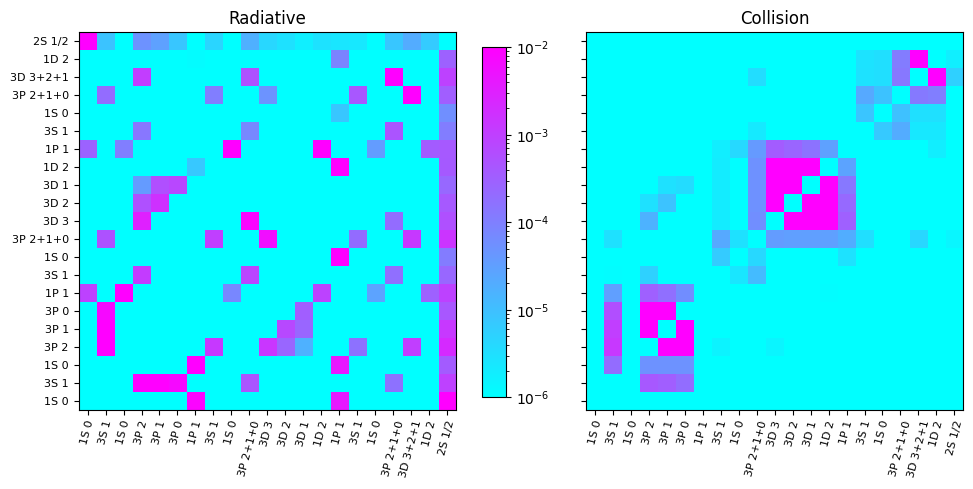

In [109]:
# Transition rale
#HelpUtil.help_(atom_He)

Plotting.transition_heatmap0(atom_He, SE_He, Rate_He, vmin=1E-6, vmax=1E-2, klevel_max=21,cmap='cool',figsize=(12,5))

True

idx of continuum is 20


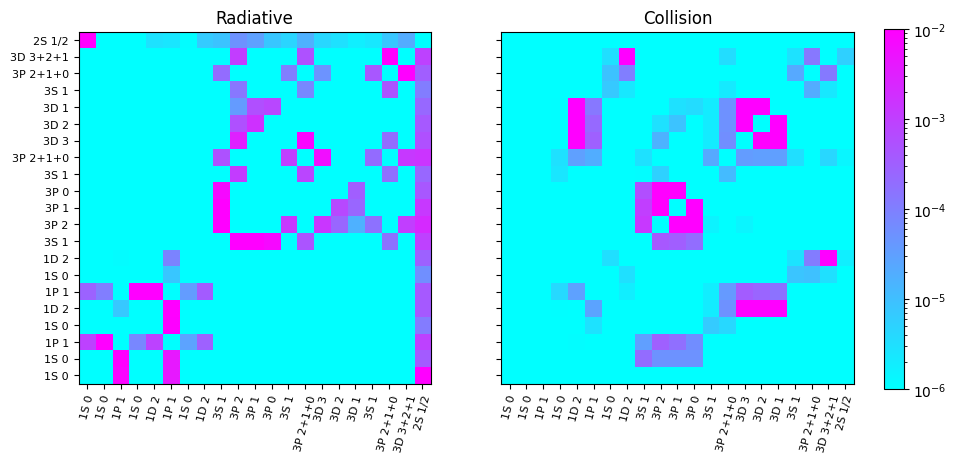

In [110]:
atom = atom_He
ctj_level = atom._ctj_table.Level
idx_singlet = []
idx_triplet = []
s2p1_list = []
for i in range(atom.nLevel):
    #print(atom.Level['stage'][i])
    ctj = ctj_level[i]
    s2p1 = ctj[1][0]
    if s2p1 == '1':   # singlet
        idx_singlet.append(i)
    elif s2p1 == '3':
        idx_triplet.append(i)
    else:
        continue
    

SE_con = SE_He
Rate_con = Rate_He
idx_sort = idx_singlet + idx_triplet
icont = np.where( (atom.Level['stage']==2) * (atom.Level['isGround']==1) )[0][0]
print(f"idx of continuum is {icont}")
idx_sort.append(icont)
n_SE = SE_con.n_SE[idx_sort]
Rmat = Rate_con.Rmat[idx_sort,:][:,idx_sort]
Cmat = Rate_con.Cmat[idx_sort,:][:,idx_sort]
ctj_level = [ctj_level[i] for i in idx_sort]
ctj_level
fig, ax = plt.subplots(1,2, figsize=(10,6), dpi=100,sharey=True)
mat_dict = {"Radiative": Rmat, "Collision": Cmat}
Plotting.transition_heatmap(fig, ax, n_SE, mat_dict, ctj_level, vmin=1E-6, vmax=1E-2,cmap='cool', title_prefix='')
#plt.show()

## level population of H and He as function of $T_e$ and $n_H$

In [44]:
#******  calculate populations in SE & LTS on (Te, Nh) ******
nTe = 51
Te_arr = np.linspace(2000, 40000, nTe)
nNh = nTe
Nh_arr = np.logspace(9, 13, nNh)
Vd = 0.
Vt = 5e5            #   cm/s
#depth = 1.E3 * 1.E5 #   km *1e5

pop_arr_H = {
    "LTE" : np.empty((atom_H.nLevel, nNh, nTe), dtype="float64"),
    "SE"  : np.empty((atom_H.nLevel, nNh, nTe), dtype="float64"),
}
pop_arr_He = {
    "LTE" : np.empty((atom_He.nLevel, nNh, nTe), dtype="float64"),
    "SE"  : np.empty((atom_He.nLevel, nNh, nTe), dtype="float64"),
}
pop_arr_Ca = {
    "LTE" : np.empty((atom_Ca.nLevel, nNh, nTe), dtype="float64"),
    "SE"  : np.empty((atom_Ca.nLevel, nNh, nTe), dtype="float64"),
}
Ne_arr = np.empty((nNh, nTe), dtype="float64")

for j in range(nNh):  
    Nh = Nh_arr[j]
    for k in range(nTe):
        Te = Te_arr[k]
        slab = Atmosphere.Atmosphere0D(Nh=Nh, Ne=Ne, Te=Te, Vd=Vd, Vt=Vt, use_Tr=False)     # slab 
        SE_H, Rate_H = SELib.cal_SE_with_Nh_Te_(atom_H, slab, wMesh_H, solar_spec_H, None)  #  level populations etc.
        SE_He, Rate_He = SELib.cal_SE_with_Nh_Te_(atom_He, slab, wMesh_He, solar_spec_He, SE_H.n_SE)  #  level populations etc.
        SE_Ca, Rate_Ca = SELib.cal_SE_with_Nh_Te_(atom_Ca, slab, wMesh_Ca, solar_spec_Ca, SE_H.n_SE)  #  level populations etc.
        Ne_arr[j,k] = atmos.Ne
        pop_arr_H["LTE"][:,j,k] = SE_H.n_LTE[:]
        pop_arr_H["SE"][:,j,k] = SE_H.n_SE[:]
        pop_arr_He["LTE"][:,j,k] = SE_He.n_LTE[:]
        pop_arr_He["SE"][:,j,k] = SE_He.n_SE[:]
        pop_arr_Ca["LTE"][:,j,k] = SE_Ca.n_LTE[:]
        pop_arr_Ca["SE"][:,j,k] = SE_Ca.n_SE[:]


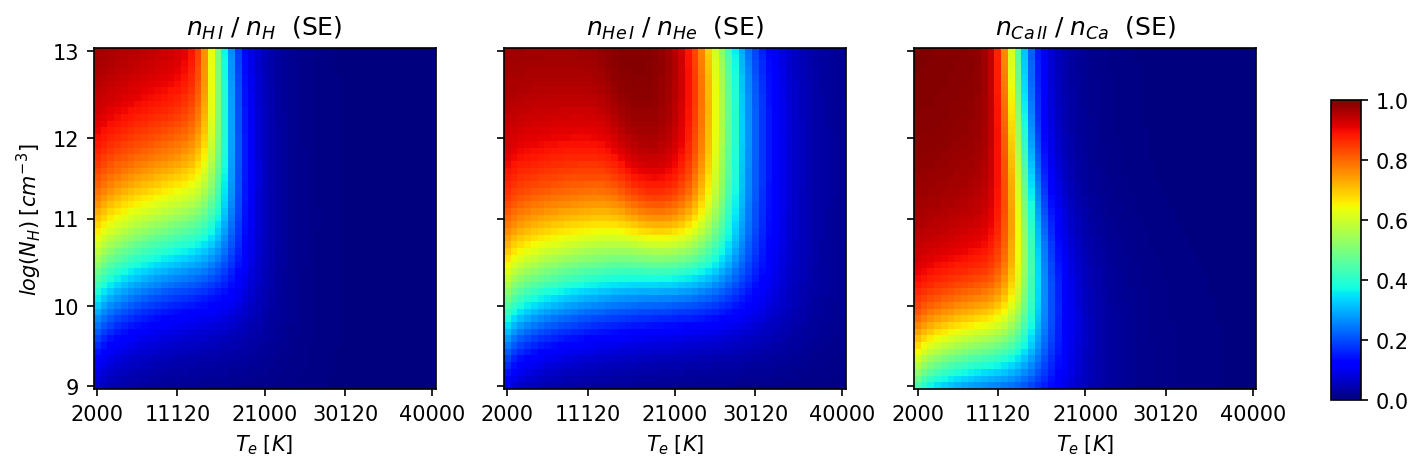

In [45]:
#  display neutral fraction of H and He on (Te, nH) plane

mask_HI = (atom_H.Level['stage'] == 1)
mask_HeI = (atom_He.Level['stage'] == 1)
mask_CaII = (atom_Ca.Level['stage'] == 2)

EQ = "SE"
nHI = np.sum(pop_arr_H[EQ][mask_HI,:,:], axis=0)
nHeI = np.sum(pop_arr_He[EQ][mask_HeI,:,:], axis=0)
nCaII = np.sum(pop_arr_Ca[EQ][mask_CaII,:,:], axis=0)

fig, axs = plt.subplots(1,3, figsize=(10,4), dpi=150, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2)
cmap = "jet"   #  "inferno"

ax=axs[0]
#mapH = ax.pcolormesh(Te_arr,Nh_arr,nHI,cmap=cmap,vmin=0,vmax=1.)
im_H = ax.imshow(nHI, cmap=cmap, origin="lower", vmin=0, vmax=1.)
Plotting.set_imshow_ticks_(ax, Te_arr, axis='x',points=5, fmt='%1.0f',rot=0)
Plotting.set_imshow_ticks_(ax, np.log10(Nh_arr), axis='y', points=5, fmt='%1.0f',rot=0)
ax.set_title("$ n_{H\, I} \; / \; n_{H} $  ("+EQ+")")
ax.set_ylabel("$log(N_{H}) \; [cm^{-3}]$")
ax.set_xlabel("$T_{e} \; [K]$")

ax = axs[1]
im_He = ax.imshow(nHeI, cmap=cmap, origin="lower", vmin=0, vmax=1.)
ax.set_title("$ n_{He\, I} \; / \; n_{He} $  ("+EQ+")")
ax.set_xlabel("$T_{e} \; [K]$")

ax = axs[2]
im_Ca = ax.imshow(nCaII, cmap=cmap, origin="lower", vmin=0, vmax=1.)
ax.set_title("$ n_{Ca\, II} \; / \; n_{Ca} $  ("+EQ+")")
ax.set_xlabel("$T_{e} \; [K]$")

cax = fig.add_axes([0.95,0.2,0.02,0.5])
fig.colorbar(im_H, cax=cax, orientation="vertical")

plt.show()

Line# = 7
Line# = 21


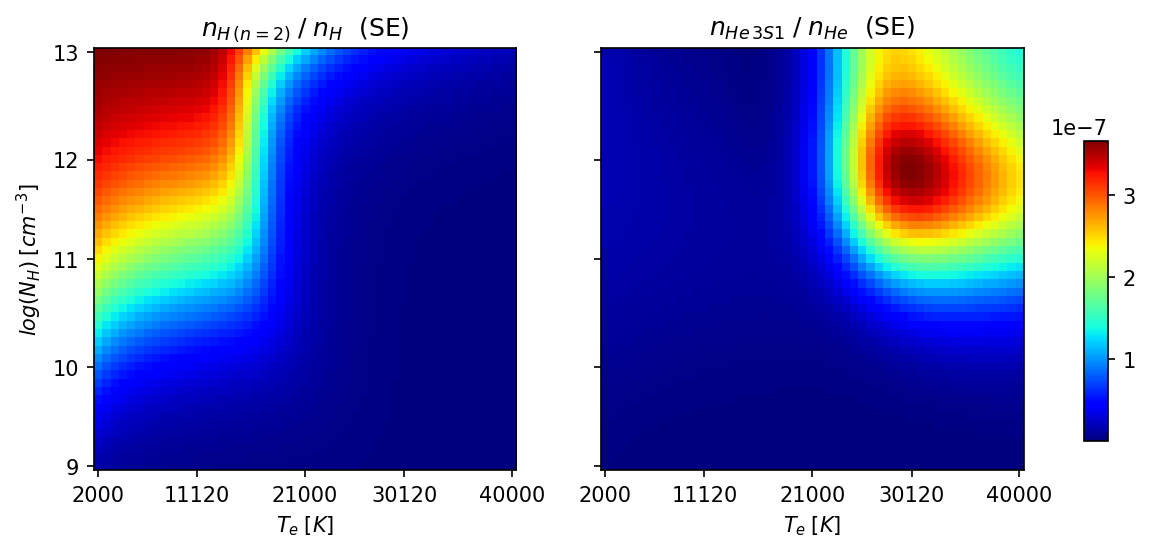

In [92]:
#********************************************************
#  Ha and 10830 lowe level population

lidx_H,lower_H,uidx_H,upper_H = level_info(atom_H, 6563.)
lidx_He,lower_He,uidx_He,upper_He = level_info(atom_He,10830.3)
EQ ="SE"
nH_l = pop_arr_H[EQ][lidx_H,:,:]
nHe_l = pop_arr_He[EQ][lidx_He,:,:]


fig, axs = plt.subplots(1,2, figsize=(8,4), dpi=150, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2)
cmap = "jet"   #  "inferno"
ax=axs[0]
#mapH = ax.pcolormesh(Te_arr,Nh_arr,nHI,cmap=cmap,vmin=0,vmax=1.)
im_H = ax.imshow(nH_l, cmap=cmap, origin="lower")#, vmin=0, vmax=1.)
Plotting.set_imshow_ticks_(ax, Te_arr, axis='x',points=5, fmt='%1.0f',rot=0)
Plotting.set_imshow_ticks_(ax, np.log10(Nh_arr), axis='y', points=5, fmt='%1.0f',rot=0)

ax.set_title("$ n_{H\, (n=2)} \; / \; n_{H} $  ("+EQ+")")
ax.set_ylabel("$log(N_{H}) \; [cm^{-3}]$")
ax.set_xlabel("$T_{e} \; [K]$")

ax = axs[1]
im_He = ax.imshow(nHe_l, cmap=cmap, origin="lower")#, vmin=0, vmax=1.)
ax.set_title("$ n_{He\, 3S1} \; / \; n_{He} $  ("+EQ+")")
ax.set_xlabel("$T_{e} \; [K]$")

cax = fig.add_axes([0.95,0.2,0.02,0.5])
fig.colorbar(im_H, cax=cax, orientation="vertical")

plt.show()

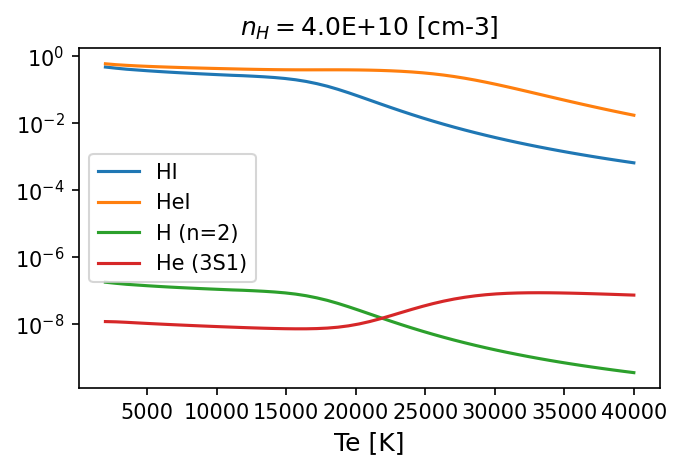

In [95]:
#******************************************************
#  plot population;  neutoral, lower level of Ha & 10830  

j = 20  #  Nh[j]

fig, ax = plt.subplots(1,1, figsize=[5,3], dpi=150)
ax.plot(Te_arr,nHI[j,:],label='HI')
ax.plot(Te_arr,nHeI[j,:],label='HeI')
ax.plot(Te_arr,nH_l[j,:],label='H (n=2)')
ax.plot(Te_arr,nHe_l[j,:],label='He ('+lower_He+')')

ax.set_yscale("log")
ax.set_xlabel("Te [K]", fontsize=12)
plt.title(f"$n_H=${Nh_arr[j]:5.1E} [cm-3]")
plt.legend()

In [148]:


atom = atom_He
wl0 = 10830.4
idxI,lower,idxJ,upper = level_info(atom,wl0)
idxI,lower,idxJ,upper

Line#= 20


(1, '3S1', 3, '3P2')

In [155]:
pop_arr_H['SE'].shape

(9, 51, 51)

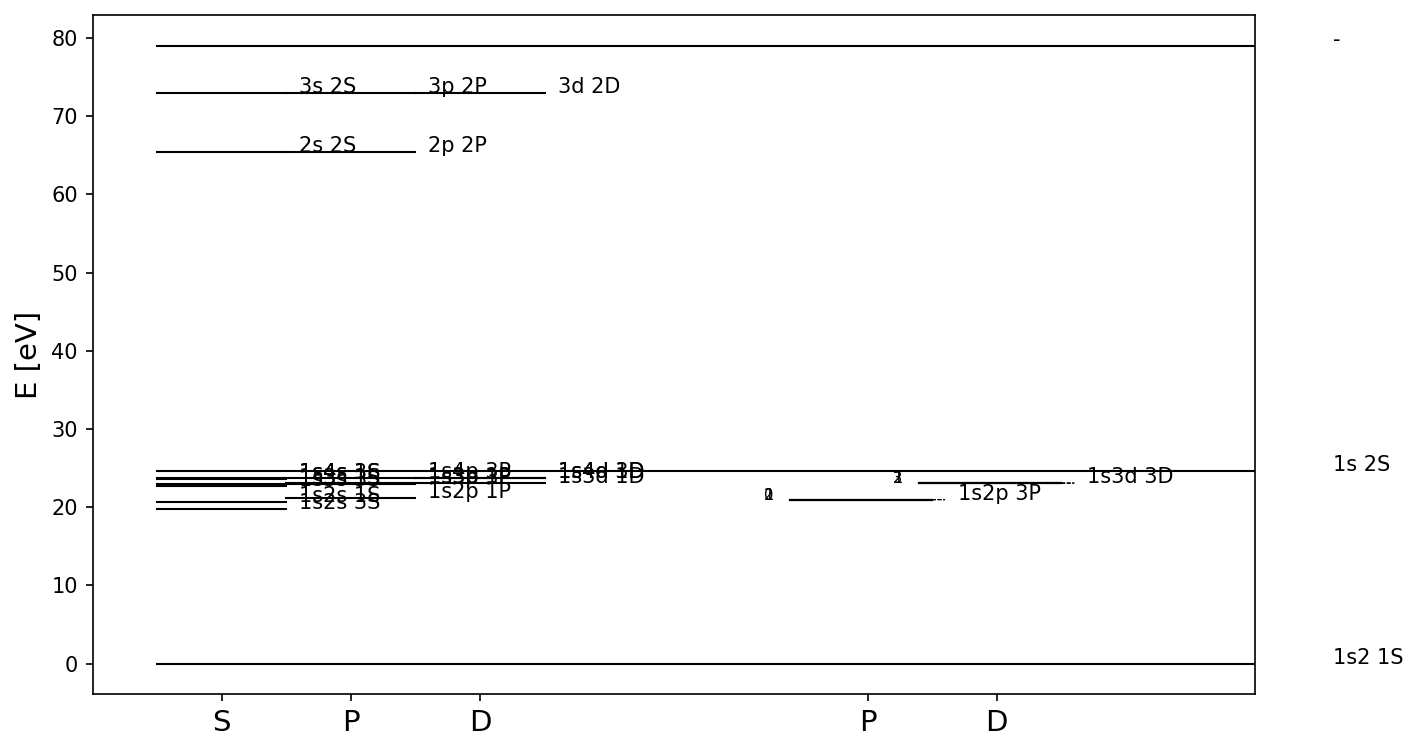

In [116]:
from spectra_src.Visual import Grotrian
gro = Grotrian.Grotrian(atom, path_dict_He["Grotrian"], )
gro.make_fig(_figsize=(10,6),_dpi=150, _f=50)
